In [1]:
import geopandas as gpd 
from shapely.wkt import loads

In [2]:
manhattan_parks_gdf= gpd.read_file('manhattan_parks_geocoded_full.geojson')

In [3]:
manhattan_parks_gdf.head()

,id,name,website,park_area,geometry
0,relation/1751075,John Jay Park,N/A,9506.859431,"POLYGON ((-73.94901 40.76981, -73.94944 40.770..."
1,relation/2389631,Governors Island,https://www.nps.gov/gois/index.htm,696227.552870,"POLYGON ((-74.01540 40.69306, -74.01556 40.693..."
2,relation/3690816,Highbridge Park,https://www.nycgovparks.org/parks/highbridge-p...,521310.282769,"MULTIPOLYGON (((-73.93110 40.84702, -73.93112 ..."
3,relation/4099553,Sara D. Roosevelt Park,https://www.nycgovparks.org/parks/sara-d-roose...,36496.652767,"MULTIPOLYGON (((-73.99377 40.71801, -73.99426 ..."
4,relation/5625630,Fort Tryon Park,https://www.nycgovparks.org/parks/fort-tryon-park,281836.601376,"MULTIPOLYGON (((-73.92808 40.86526, -73.92816 ..."


In [4]:
manhattan_parks_gdf=manhattan_parks_gdf.drop('website',axis=1)

In [5]:
manhattan_parks_gdf['name'].duplicated().sum()

23

In [6]:
manhattan_parks_gdf= manhattan_parks_gdf.rename(columns={'id':'park_id','name':'park_name'})

In [7]:
manhattan_parks_gdf.head()

,park_id,park_name,park_area,geometry
0,relation/1751075,John Jay Park,9506.859431,"POLYGON ((-73.94901 40.76981, -73.94944 40.770..."
1,relation/2389631,Governors Island,696227.552870,"POLYGON ((-74.01540 40.69306, -74.01556 40.693..."
2,relation/3690816,Highbridge Park,521310.282769,"MULTIPOLYGON (((-73.93110 40.84702, -73.93112 ..."
3,relation/4099553,Sara D. Roosevelt Park,36496.652767,"MULTIPOLYGON (((-73.99377 40.71801, -73.99426 ..."
4,relation/5625630,Fort Tryon Park,281836.601376,"MULTIPOLYGON (((-73.92808 40.86526, -73.92816 ..."


In [8]:
manhattan_parks_gdf.explore()

In [9]:

duplicated_parks = manhattan_parks_gdf[manhattan_parks_gdf['park_name'].duplicated(keep='first')]


duplicated_park_names = duplicated_parks['park_name'].unique()

print(duplicated_park_names)


print(duplicated_parks)


['Riverside Park' 'Chelsea Waterside Park' 'Seward Park Extension Park'
 'Saint Vartan Park' '625 Jaffe Dr, New York, NY 10023, USA'
 '103 W 62nd St, New York, NY 10023, USA' 'Collyer Brothers Park'
 'Cherry Tree Park' 'Sherman Creek']
             park_id                               park_name      park_area  \
130    way/118524675                          Riverside Park  224433.740352   
159    way/178575123                          Riverside Park  415322.987505   
170    way/221922459                  Chelsea Waterside Park   41299.034704   
372    way/964822654              Seward Park Extension Park    1461.866664   
388   way/1082729243                       Saint Vartan Park    2039.762132   
427    way/796338416   625 Jaffe Dr, New York, NY 10023, USA       0.000000   
428    way/796338421  103 W 62nd St, New York, NY 10023, USA       0.000000   
429    way/796338419  103 W 62nd St, New York, NY 10023, USA       0.000000   
430    way/796338423  103 W 62nd St, New York, NY 100

In [10]:
import geopandas as gpd

unique_parks_gdf = manhattan_parks_gdf.dissolve(by='park_name')

unique_parks_gdf = unique_parks_gdf.reset_index()

print(unique_parks_gdf)


                                  park_name  \
0     1 Downing St, New York, NY 10014, USA   
1      1 E 99th St, New York, NY 10029, USA   
2    103 W 62nd St, New York, NY 10023, USA   
3             103rd Street Community Garden   
4     105 E 2nd St, New York, NY 10009, USA   
..                                      ...   
444                        White Playground   
445        William E. Passannante Ballfield   
446                Winston Churchill Square   
447                          Yu Suen Garden   
448                           Zuccotti Park   

                                              geometry         park_id  \
0    POLYGON ((-74.00290 40.72986, -74.00279 40.729...   way/894035808   
1    POLYGON ((-73.94311 40.78519, -73.94277 40.785...   way/225190397   
2    GEOMETRYCOLLECTION (POINT (-73.98363 40.77135)...   way/796338415   
3    POLYGON ((-73.94828 40.79097, -73.94852 40.791...   way/225189391   
4    POLYGON ((-73.98793 40.72315, -73.98738 40.722...  way/10839

In [11]:
unique_parks_gdf['park_name'].duplicated().sum()

0

In [12]:
unique_parks_gdf.shape

(449, 4)

In [13]:
unique_parks_gdf.columns

Index(['park_name', 'geometry', 'park_id', 'park_area'], dtype='object')

<Axes: title={'center': 'Park Area'}, ylabel='Frequency'>

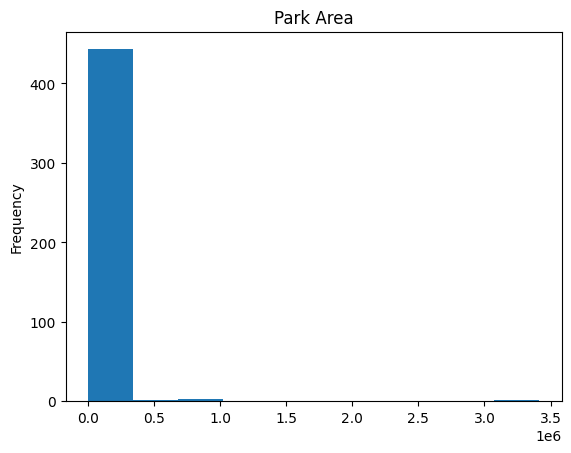

In [14]:
unique_parks_gdf['park_area'].plot(kind='hist', title='Park Area')

<Axes: title={'center': 'park_area'}>

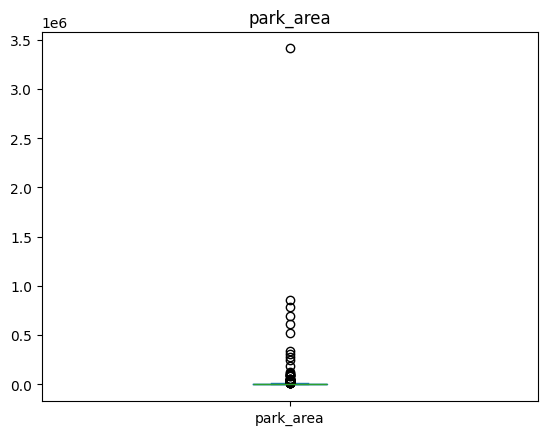

In [15]:
unique_parks_gdf['park_area'].plot(kind='box', title='park_area')

In [34]:
unique_parks_gdf_area=unique_parks_gdf[unique_parks_gdf['park_area']>1930]
unique_parks_gdf_area

,park_name,geometry,park_id,park_area
1,"1 E 99th St, New York, NY 10029, USA","POLYGON ((-73.94311 40.78519, -73.94277 40.785...",way/225190397,2312.951562
9,14th Street Park,"POLYGON ((-74.00849 40.74306, -74.00850 40.743...",way/22904239,2972.993684
12,"165 West End Ave, New York, NY 10023, USA","POLYGON ((-73.98799 40.77703, -73.98771 40.776...",way/918302837,7290.827044
16,"175 E 128th St, New York, NY 10035, USA","POLYGON ((-73.93415 40.80673, -73.93437 40.806...",way/225173496,1952.314196
28,"2328 Amsterdam Ave, New York, NY 10033, USA","POLYGON ((-73.93282 40.84516, -73.93345 40.844...",way/588483880,3261.820758
...,...,...,...,...
442,West Harlem Piers Park,"POLYGON ((-73.95982 40.82030, -73.96000 40.820...",way/118528235,11663.836242
443,West Thames Park,"POLYGON ((-74.01521 40.70972, -74.01524 40.709...",way/400782872,8692.216750
444,White Playground,"POLYGON ((-73.94603 40.79199, -73.94602 40.791...",way/225189359,2687.954346
445,William E. Passannante Ballfield,"POLYGON ((-74.00235 40.72893, -74.00260 40.728...",way/244977216,2361.134289


In [17]:
unique_parks_gdf['park_area'].mean()

25412.441777785563

In [18]:
unique_parks_gdf_name=unique_parks_gdf[unique_parks_gdf['park_name']=='Cooper Playground']
unique_parks_gdf_name

,park_name,geometry,park_id,park_area


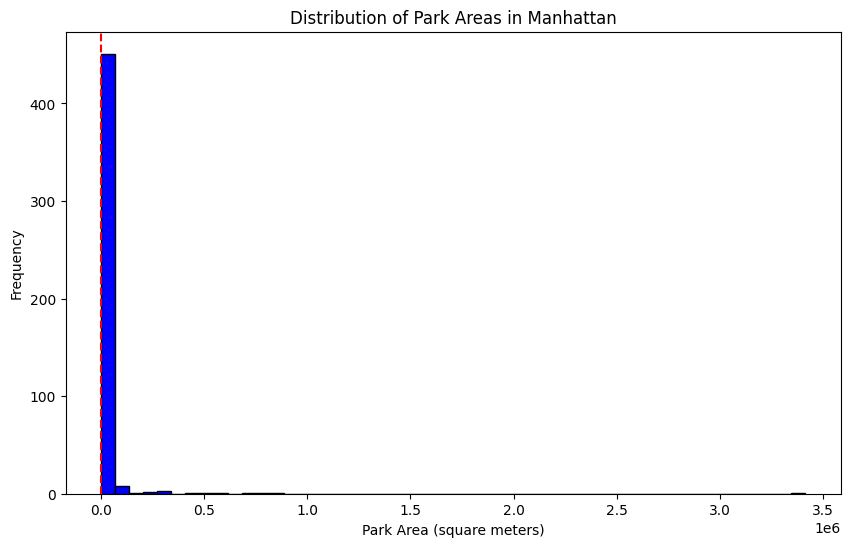

In [19]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(manhattan_parks_gdf['park_area'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Park Area (square meters)')
plt.ylabel('Frequency')
plt.title('Distribution of Park Areas in Manhattan')
plt.axvline(x=100, color='red', linestyle='--') 
plt.show()

In [20]:
print(unique_parks_gdf['park_area'].describe())

count    4.490000e+02
mean     2.541244e+04
std      1.790180e+05
min      0.000000e+00
25%      6.447187e+02
50%      1.930718e+03
75%      6.480711e+03
max      3.413739e+06
Name: park_area, dtype: float64


In [30]:

area_threshold = 1930.72


filtered_parks_gdf = unique_parks_gdf[unique_parks_gdf['park_area'] >= area_threshold]


print(filtered_parks_gdf)

                                       park_name  \
1           1 E 99th St, New York, NY 10029, USA   
9                               14th Street Park   
12     165 West End Ave, New York, NY 10023, USA   
16       175 E 128th St, New York, NY 10035, USA   
28   2328 Amsterdam Ave, New York, NY 10033, USA   
..                                           ...   
442                       West Harlem Piers Park   
443                             West Thames Park   
444                             White Playground   
445             William E. Passannante Ballfield   
448                                Zuccotti Park   

                                              geometry        park_id  \
1    POLYGON ((-73.94311 40.78519, -73.94277 40.785...  way/225190397   
9    POLYGON ((-74.00849 40.74306, -74.00850 40.743...   way/22904239   
12   POLYGON ((-73.98799 40.77703, -73.98771 40.776...  way/918302837   
16   POLYGON ((-73.93415 40.80673, -73.93437 40.806...  way/225173496   
28   POLYG

In [31]:
filtered_parks_gdf.explore()

c:\Users\Justh\anaconda3\envs\comp47360\Lib\site-packages\folium\features.py:1155: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'park_name': 'Cherry Tree Park', 'park_id': 'way/225188968', 'park_area': 3682.4002634724898}] to MultiPolygon for full functionality.
https://tools.ietf.org/html/rfc7946#page-9
  warnings.warn(


In [23]:
unique_parks_gdf_area.explore()

c:\Users\Justh\anaconda3\envs\comp47360\Lib\site-packages\folium\features.py:1155: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'park_name': 'Cherry Tree Park', 'park_id': 'way/225188968', 'park_area': 3682.4002634724898}] to MultiPolygon for full functionality.
https://tools.ietf.org/html/rfc7946#page-9
  warnings.warn(


In [24]:
type(filtered_parks_gdf)

geopandas.geodataframe.GeoDataFrame

In [25]:
filtered_parks_gdf=filtered_parks_gdf[['park_id','park_name','park_area','geometry']]

In [26]:
#filtered_parks_gdf.to_file('filtered_parks_50%.geojson',driver='GeoJSON')

In [27]:
filtered_parks_gdf.head()

,park_id,park_name,park_area,geometry
1,way/225190397,"1 E 99th St, New York, NY 10029, USA",2312.951562,"POLYGON ((-73.94311 40.78519, -73.94277 40.785..."
9,way/22904239,14th Street Park,2972.993684,"POLYGON ((-74.00849 40.74306, -74.00850 40.743..."
12,way/918302837,"165 West End Ave, New York, NY 10023, USA",7290.827044,"POLYGON ((-73.98799 40.77703, -73.98771 40.776..."
16,way/225173496,"175 E 128th St, New York, NY 10035, USA",1952.314196,"POLYGON ((-73.93415 40.80673, -73.93437 40.806..."
28,way/588483880,"2328 Amsterdam Ave, New York, NY 10033, USA",3261.820758,"POLYGON ((-73.93282 40.84516, -73.93345 40.844..."
